In [1]:
import numpy as np
import pandas as pd
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

from bart_playground import Tree, Parameters
from bart_playground import Break, Combine, Grow, Birth, Death
from bart_playground import Dataset
from bart_playground import visualize_tree 
from bart_playground import *  # Import the updated DataGenerator class

In [2]:
dgen = DataGenerator(n_samples=100, n_features=3, noise=0.1, random_seed=42)
X, y = dgen.generate(scenario="linear")

rng = np.random.default_rng(42)

In [3]:
def tearDown(filename):
    expected_filepath = f"{filename}.png"
    if os.path.exists(expected_filepath):
        os.remove(expected_filepath)

In [4]:
tree1 = Tree.new(dataX=X)
trees = [tree1]
params = Parameters(trees, {"eps_sigma2": 1})
params.trees

[Tree(vars=[-1 -2 -2 -2 -2 -2 -2 -2], thresholds=[nan nan nan nan nan nan nan nan], leaf_vals=[ 0. nan nan nan nan nan nan nan], n_vals=[100  -2  -2  -2  -2  -2  -2  -2])]

In [5]:
preprocessor = DefaultPreprocessor()
possible_thresholds=preprocessor.gen_thresholds(X=X)

In [6]:
move = Grow(params, trees_changed=[0], possible_thresholds=possible_thresholds)
move.propose(rng)
trees = move.proposed.trees
tree_g = move.proposed.trees[0]

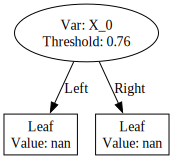

In [7]:
filename_g = "tree_g"
visualize_tree(tree_g, filename=filename_g, format="png")

In [8]:
params = Parameters(trees, {"eps_sigma2": 1})
move = Grow(params, trees_changed=[0], possible_thresholds=possible_thresholds)
move.propose(rng)
tree_gg = move.proposed.trees[0]

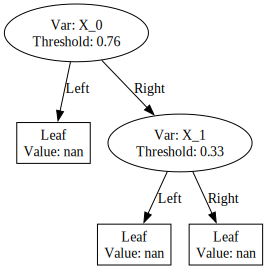

In [9]:
filename_gg = "tree_gg"
visualize_tree(tree_gg, filename=filename_gg, format="png")

In [10]:
trees = [tree_gg,tree_g]
params = Parameters(trees, {"eps_sigma2": 1})
params.trees

[Tree(vars=[ 0 -1  1 -2 -2 -1 -1 -2], thresholds=[0.76202731        nan 0.33203344        nan        nan        nan
         nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  77  23  -2  -2   9  14  -2]),
 Tree(vars=[ 0 -1 -1 -2 -2 -2 -2 -2], thresholds=[0.76202731        nan        nan        nan        nan        nan
         nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  77  23  -2  -2  -2  -2  -2])]

# Break

In [11]:
move = Break(params, trees_changed=[0])
move.propose(rng)
move.proposed.trees

[Tree(vars=[ 0 -1 -1 -2], thresholds=[0.76202731        nan        nan        nan], leaf_vals=[nan nan nan nan], n_vals=[100  77  23  -2]),
 Tree(vars=[ 0 -1 -1 -2 -2 -2 -2 -2], thresholds=[0.76202731        nan        nan        nan        nan        nan
         nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  77  23  -2  -2  -2  -2  -2]),
 Tree(vars=[ 1 -1 -1 -2], thresholds=[0.33203344        nan        nan        nan], leaf_vals=[nan nan nan nan], n_vals=[100  43  57  -2])]

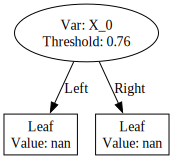

In [12]:
tree_b1 = move.proposed.trees[0]
filename1 = "tree_b1"
visualize_tree(tree_b1, filename=filename1, format="png")

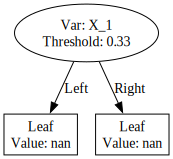

In [13]:
tree_b2 = move.proposed.trees[-1]
filename2 = "tree_b2"
visualize_tree(tree_b2, filename=filename2, format="png")

# Combine

In [14]:
rng = np.random.default_rng(24)
trees = [tree1]
params = Parameters(trees, {"eps_sigma2": 1})
move = Grow(params, trees_changed=[0], possible_thresholds=possible_thresholds)
move.propose(rng)
tree_g_2 = move.proposed.trees[0]

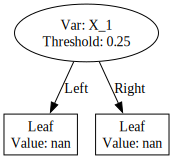

In [15]:
filename_g2 = "tree_g_2"
visualize_tree(tree_g_2, filename=filename_g2, format="png")

In [16]:
trees = [tree_g,tree_g_2]
params = Parameters(trees, {"eps_sigma2": 1})
params.trees

[Tree(vars=[ 0 -1 -1 -2 -2 -2 -2 -2], thresholds=[0.76202731        nan        nan        nan        nan        nan
         nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  77  23  -2  -2  -2  -2  -2]),
 Tree(vars=[ 1 -1 -1 -2 -2 -2 -2 -2], thresholds=[0.25379451        nan        nan        nan        nan        nan
         nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  33  67  -2  -2  -2  -2  -2])]

In [17]:
move = Combine(params, trees_changed=[0,1])
move.propose(rng)
move.proposed.trees

[Tree(vars=[ 0 -1  1 -2 -2 -1 -1 -2], thresholds=[0.76202731        nan 0.25379451        nan        nan        nan
         nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  77  23  -2  -2   8  15  -2])]

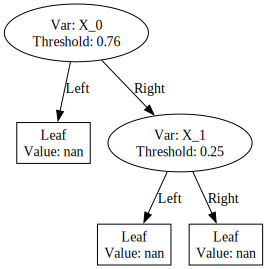

In [18]:
tree_com = move.proposed.trees[0]
filename3 = "tree_com"
visualize_tree(tree_com, filename=filename3, format="png")

In [19]:
tearDown(filename1)
tearDown(filename2)
tearDown(filename3)
tearDown(filename_g)
tearDown(filename_gg)
tearDown(filename_g2)

# Birth & Death

In [20]:
trees = [tree_gg,tree_g]
params = Parameters(trees, {"eps_sigma2": 1})
params.trees

[Tree(vars=[ 0 -1  1 -2 -2 -1 -1 -2], thresholds=[0.76202731        nan 0.33203344        nan        nan        nan
         nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  77  23  -2  -2   9  14  -2]),
 Tree(vars=[ 0 -1 -1 -2 -2 -2 -2 -2], thresholds=[0.76202731        nan        nan        nan        nan        nan
         nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  77  23  -2  -2  -2  -2  -2])]

In [21]:
move = Birth(params, trees_changed=[0])
move.propose(rng)
move.proposed.trees

[Tree(vars=[ 0 -1  1 -2 -2 -1 -1 -2], thresholds=[0.76202731        nan 0.33203344        nan        nan        nan
         nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  77  23  -2  -2   9  14  -2]),
 Tree(vars=[ 0 -1 -1 -2 -2 -2 -2 -2], thresholds=[0.76202731        nan        nan        nan        nan        nan
         nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  77  23  -2  -2  -2  -2  -2]),
 Tree(vars=[-1 -2], thresholds=[nan nan], leaf_vals=[nan nan], n_vals=[100  -2])]

In [22]:
params = move.proposed
move = Death(params, trees_changed=[1, 2])
move.propose(rng)
move.proposed.trees

[Tree(vars=[ 0 -1  1 -2 -2 -1 -1 -2], thresholds=[0.76202731        nan 0.33203344        nan        nan        nan
         nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  77  23  -2  -2   9  14  -2]),
 Tree(vars=[ 0 -1 -1 -2 -2 -2 -2 -2], thresholds=[0.76202731        nan        nan        nan        nan        nan
         nan        nan], leaf_vals=[nan nan nan nan nan nan nan nan], n_vals=[100  77  23  -2  -2  -2  -2  -2])]